<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S9-V2/S9Final_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount your G-Drive**

In [1]:
from __future__ import print_function
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


**Add Library Path in your def search path**

In [2]:
import sys
sys.path.append('/content/drive/My Drive/EVA4/lib2')
!ls '/content/drive/My Drive/EVA4/lib2'

AlbTestTransforms.py   displayData.py  __pycache__
AlbTrainTransforms.py  execute.py      resNet.py
DataLoaders.py	       Gradcam.py      rohan_library.py


**Import required libraries**

In [4]:
from rohan_library import *
import execute
from resNet import ResNet18
import displayData as display
import Gradcam 
# from Gradcam import GRADCAM, PLOT
import albumentations as alb
import DataLoaders as loader
import AlbTestTransforms
import AlbTrainTransforms

REQUIRED LIBRARIES LOADED...


**Albumentations**

In [0]:
from albumentations import Compose, Normalize
from albumentations.pytorch import ToTensor
albTrain = AlbTrainTransforms.train_transforms()
albTest = AlbTestTransforms.test_transforms()

**Load the Datasets**

In [6]:
train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = albTrain)
test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = albTest)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**DataLoader for Train & Test Dataset**

In [0]:
dl = loader.DataLoaders()
trainLoader = dl.dataLoader(train)
testLoader = dl.dataLoader(test)


In [9]:
dataiter = iter(trainLoader)
# iter(trainLoader).next()

images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([128, 3, 32, 32])
torch.Size([128])


**Displaying Random Images**

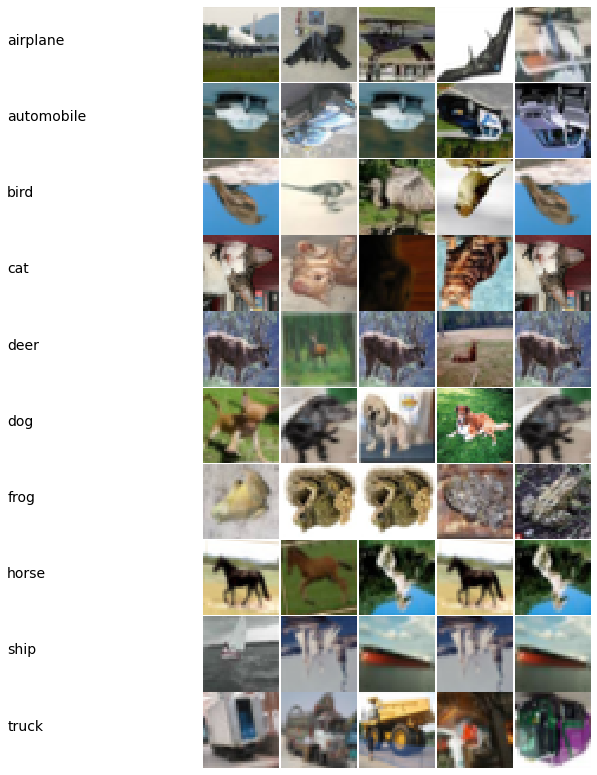

In [10]:
display.classImages(trainLoader)

**Model Summary**

In [11]:
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print('Device set to ', device)

model = ResNet18().to(device)
summary(model, input_size=(3,32,32))

Device set to  cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-1

**Modelling**

In [12]:
incorrectSamples = []
correctSamples = []
correctLabels = []
model = ResNet18().to(device)


criterion = execute.cross_entropy_loss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainLoader), epochs = 15)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=12, gamma=0.1)


model1 = execute.Test_Train()
EPOCHS = 15

for epoch in range(1, EPOCHS+1):
  print('EPOCH: ',epoch)
  model1.train(model, device, trainLoader, optimizer, epoch, scheduler, criterion, L1lambda = 1e-5 )
  model1.test(model, device, testLoader, 'model1.pt', criterion, correctSamples, correctLabels, incorrectSamples)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  1


Loss=2.3382341861724854 Batch_id=390 Accuracy=42.57: 100%|██████████| 391/391 [00:29<00:00, 13.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.5662).  Saving model ...

Test set: Average loss: 1.5662, Accuracy: 5048/10000 (50.48%)

EPOCH:  2


Loss=1.907501220703125 Batch_id=390 Accuracy=57.37: 100%|██████████| 391/391 [00:29<00:00, 13.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.5662 --> 1.0662).  Saving model ...

Test set: Average loss: 1.0662, Accuracy: 5537/10000 (55.37%)

EPOCH:  3


Loss=1.6751058101654053 Batch_id=390 Accuracy=65.38: 100%|██████████| 391/391 [00:29<00:00, 13.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.0662 --> 0.8210).  Saving model ...

Test set: Average loss: 0.8210, Accuracy: 6567/10000 (65.67%)

EPOCH:  4


Loss=1.646028995513916 Batch_id=390 Accuracy=70.21: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4249, Accuracy: 6878/10000 (68.78%)

EPOCH:  5


Loss=1.4175937175750732 Batch_id=390 Accuracy=74.03: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9876, Accuracy: 7436/10000 (74.36%)

EPOCH:  6


Loss=1.4975175857543945 Batch_id=390 Accuracy=75.86: 100%|██████████| 391/391 [00:29<00:00, 13.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1863, Accuracy: 7336/10000 (73.36%)

EPOCH:  7


Loss=1.3047308921813965 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:29<00:00, 13.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9541, Accuracy: 7468/10000 (74.68%)

EPOCH:  8


Loss=1.0850780010223389 Batch_id=390 Accuracy=79.40: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.8210 --> 0.2847).  Saving model ...

Test set: Average loss: 0.2847, Accuracy: 7729/10000 (77.29%)

EPOCH:  9


Loss=1.1919806003570557 Batch_id=390 Accuracy=81.08: 100%|██████████| 391/391 [00:29<00:00, 13.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0568, Accuracy: 7681/10000 (76.81%)

EPOCH:  10


Loss=1.0741041898727417 Batch_id=390 Accuracy=82.47: 100%|██████████| 391/391 [00:29<00:00, 13.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.2847 --> 0.2683).  Saving model ...

Test set: Average loss: 0.2683, Accuracy: 7926/10000 (79.26%)

EPOCH:  11


Loss=0.9234122037887573 Batch_id=390 Accuracy=84.15: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3667, Accuracy: 8160/10000 (81.60%)

EPOCH:  12


Loss=0.7548419237136841 Batch_id=390 Accuracy=86.07: 100%|██████████| 391/391 [00:29<00:00, 13.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1275, Accuracy: 8483/10000 (84.83%)

EPOCH:  13


Loss=0.8244100213050842 Batch_id=390 Accuracy=88.47: 100%|██████████| 391/391 [00:29<00:00, 13.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2941, Accuracy: 8564/10000 (85.64%)

EPOCH:  14


Loss=0.6259176731109619 Batch_id=390 Accuracy=91.01: 100%|██████████| 391/391 [00:29<00:00, 13.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5218, Accuracy: 8798/10000 (87.98%)

EPOCH:  15


Loss=0.754241406917572 Batch_id=390 Accuracy=92.56: 100%|██████████| 391/391 [00:29<00:00, 13.14it/s]



Test set: Average loss: 0.3434, Accuracy: 8813/10000 (88.13%)



**Plot Train & Test Curves**

Text(0.5, 1.0, 'Test Accuracy')

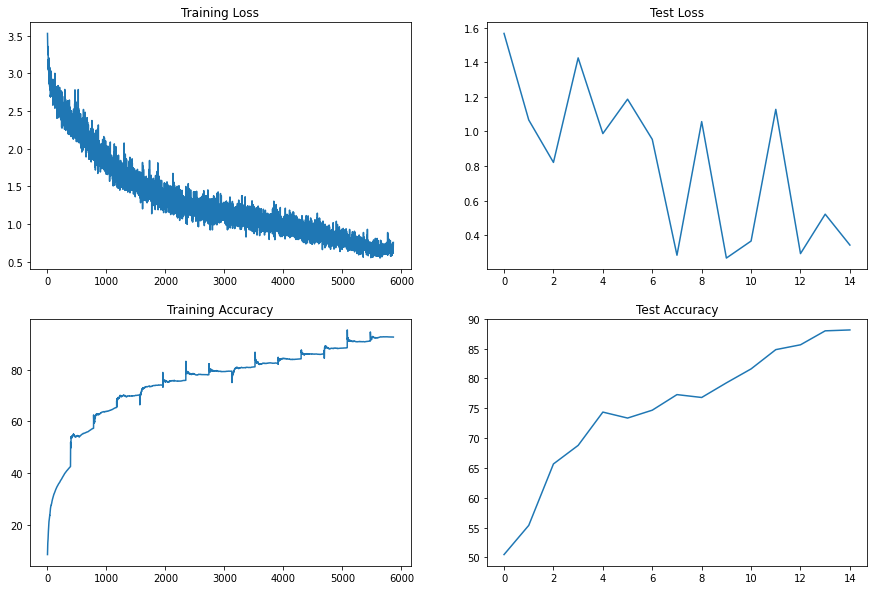

In [13]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")

**Data for GradCam**

In [14]:

images = [x['image'] for x in incorrectSamples[10:14]]
target_classes = [l['label'] for l in incorrectSamples[10:14]]
# print(images)
for i in target_classes:
  print(classes[i])


deer
cat
car
plane


**GradCam Implementation**

torch.Size([4, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


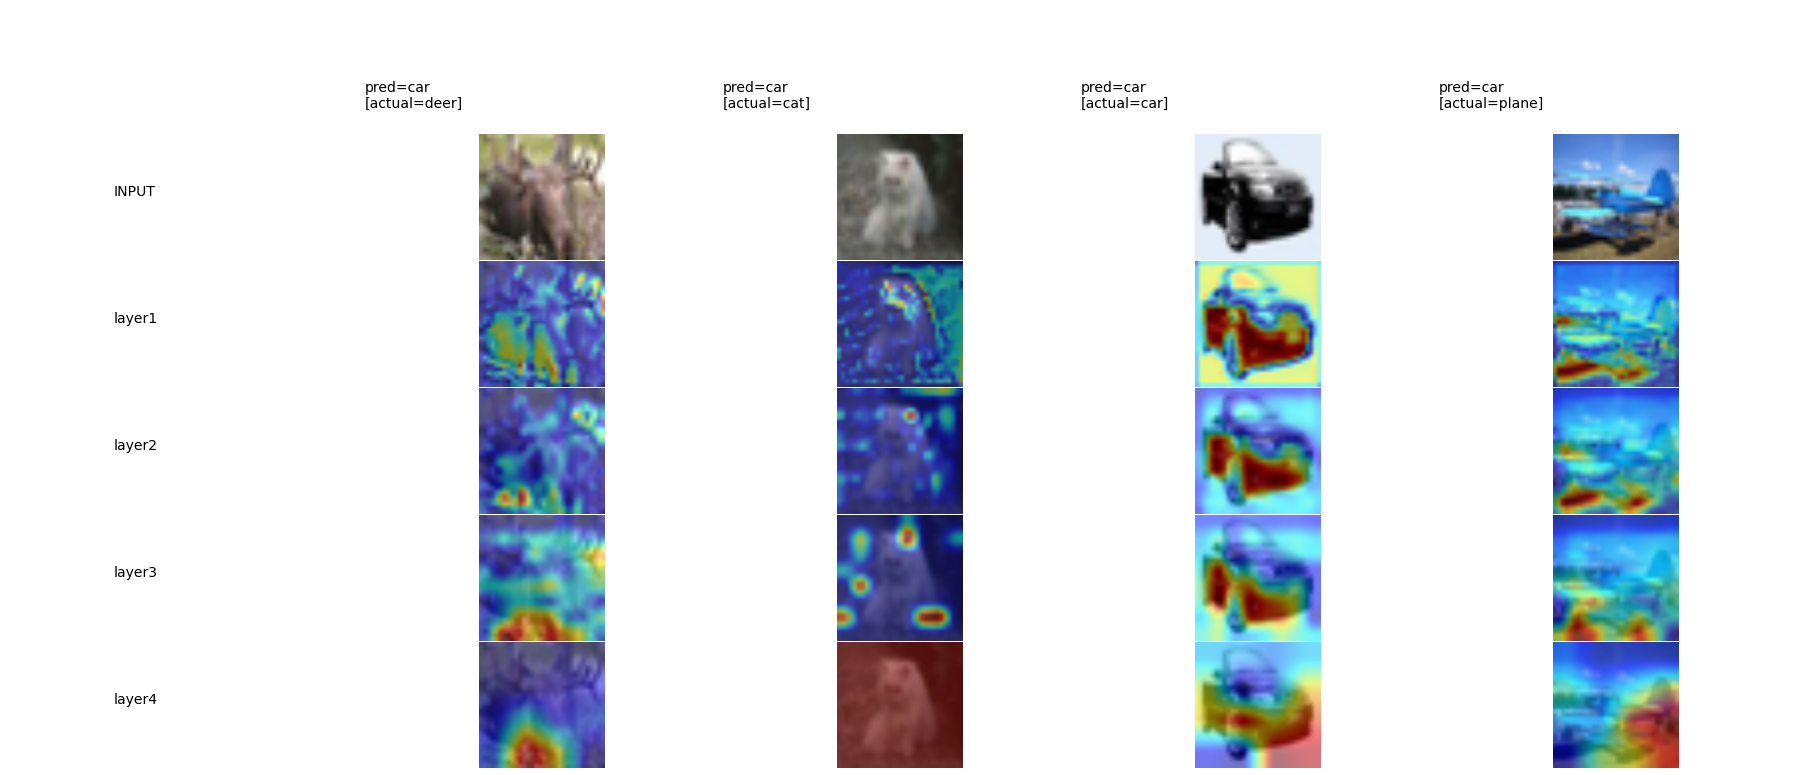

In [15]:
model = ResNet18().to(device)
image_size = (3,32,32)

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = Gradcam.GRADCAM(images, device, target_classes, model, target_layers)

Gradcam.PLOT(gradcam_output, images, target_classes, target_layers, classes, image_size, predicted_classes, display.unnormalize)


<Figure size 936x936 with 0 Axes>

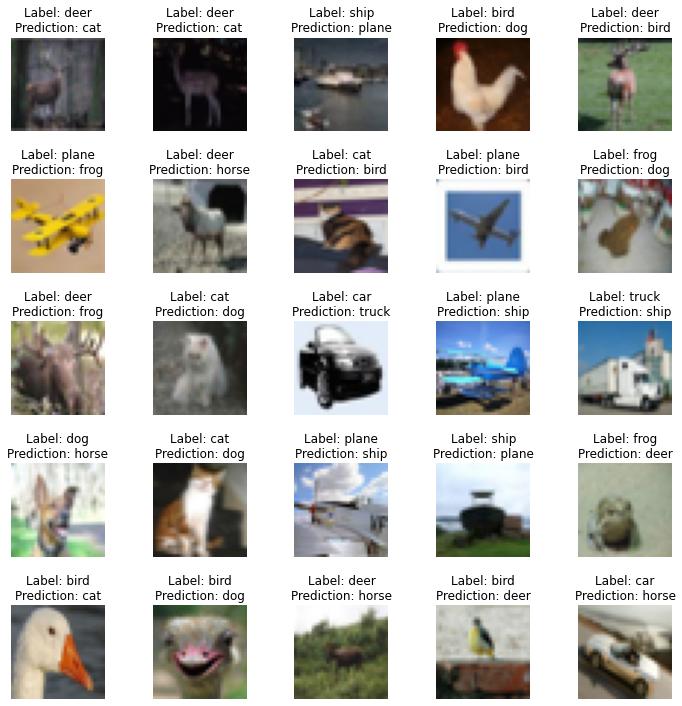

In [16]:
display.misclassifiedOnes(model, testLoader, incorrectSamples,'Misclassfied.png')